# Проблема №1 
#### Data on job training grants for US firms, the effect of the job training grant on hours of job training per employee
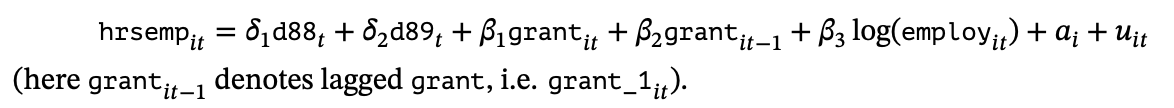

In [233]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, FirstDifferenceOLS, PooledOLS

### (1) Read the dataset

In [235]:
jtrain0 = pd.read_csv('jtrain1.csv', na_values ='.') # пропущенные значения обозначены как '.'
print(jtrain0.head())  # выводим первые 5 строк для проверки
jtrain = jtrain0.set_index(['fcode', 'year']) # устанавливаем индексы: идентификатор фирмы и год

   year   fcode  employ       sales   avgsal  scrap  rework  tothrs  union  \
0  1987  410032   100.0  47000000.0  35000.0    NaN     NaN    12.0      0   
1  1988  410032   131.0  43000000.0  37000.0    NaN     NaN     8.0      0   
2  1989  410032   123.0  49000000.0  39000.0    NaN     NaN     8.0      0   
3  1987  410440    12.0   1560000.0  10500.0    NaN     NaN    12.0      0   
4  1988  410440    13.0   1970000.0  11000.0    NaN     NaN    12.0      0   

   grant  ...  grant_1  clscrap  cgrant  clemploy   clsales    lavgsal  \
0      0  ...        0      NaN       0       NaN       NaN  10.463100   
1      0  ...        0      NaN       0  0.270027 -0.088949  10.518670   
2      0  ...        0      NaN       0 -0.063013  0.130621  10.571320   
3      0  ...        0      NaN       0       NaN       NaN   9.259130   
4      0  ...        0      NaN       0  0.080043  0.233347   9.305651   

   clavgsal  cgrant_1   chrsemp  clhrsemp  
0       NaN       NaN       NaN       NaN 

### (2) Estimate the equation using fixed effects

In [290]:
x = ['d88', 'd89', 'grant', 'grant_1', 'lemploy']
xx = sm.add_constant(jtrain[x]) # добавляем константу

fe_model = PanelOLS(jtrain['hrsemp'], xx, entity_effects=True)
fe_results = fe_model.fit(cov_type='clustered', cluster_entity = True) 
    # ставим кластерные ошибки, которые как раз heteroskedasticity and autocorrelation robust
    # вероятно, можно было сделать поправку только на гетероскедастичность
    # разница между ошибками robust и ошибками clustered небольшая
print(fe_results)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 hrsemp   R-squared:                        0.4909
Estimator:                   PanelOLS   R-squared (Between):              0.0481
No. Observations:                 390   R-squared (Within):               0.4909
Date:                Sun, Feb 02 2025   R-squared (Overall):              0.2201
Time:                        02:06:19   Log-likelihood                   -1503.7
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      48.206
Entities:                         135   P-value                           0.0000
Avg Obs:                       2.8889   Distribution:                   F(5,250)
Min Obs:                       1.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             21.665
                            

/opt/anaconda3/lib/python3.12/site-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


#### How many firms are used in the FE estimation?

In [274]:
num_firms_in_model = fe_results.nobs / 3 # каждая фирма рассмотрена в 3 года
print(f"Number of firms used in the regression: {num_firms_in_model}")

Number of firms used in the regression: 130.0


#### How many total observations would be used if each firm had data on all variables (in particular, hrsemp) for all three years?

In [256]:
num_firms_all = jtrain0['fcode'].nunique()
total_observations = num_firms_all * 3
print(f"Number of all firms: {num_firms_all}")
print(f"Number of all observations: {total_observations }")

Number of all firms: 157
Number of all observations: 471


### (3) Interpret the coefficient on grant and comment on its significance
p-value grant < 0,05, значит, коэффициент значимый


Интерпретация: если фирма получила грант, то количество часов обучения (training) на 1 сотрудника, занятого в обучении, увеличивается в среднем при прочих равных на 34,2 часа при фиксированных  индивидуальных эффектах фирм


### (4) Is it surprising that grant_1 is insignificant?
grant_1 предполагает, что фирма получила грант в предыдущем году, а использует его в текущем, то есть существует лаг. Раз коэффициент незначимый, то наша догадка о существовании лага не подтвердилась, и фирмы склонны увеличивать часы обучения сотрудников в том же году, в котором они получили грант.

### (5) Do larger firms provide their employees with more or less training, on average?
Надо смотреть на коэффициент log(employ), но он незначимый, то есть лучше бы его вообще не интерпретировать и не делать выводы. 
Но если надо: в среднем и при прочих равных крупные по числу сотрудников фирмы предлагают меньше обучения, чем мелкие фирмы. Если у фирмы увеличивается на 10% количество сотрудников, то количество часов обучения на 1 сотрудника уменьшается в среднем и при прочих равных на 0,1763 * 0,01 * 10 = 0,01763, что незначительно.

# Проблема №2
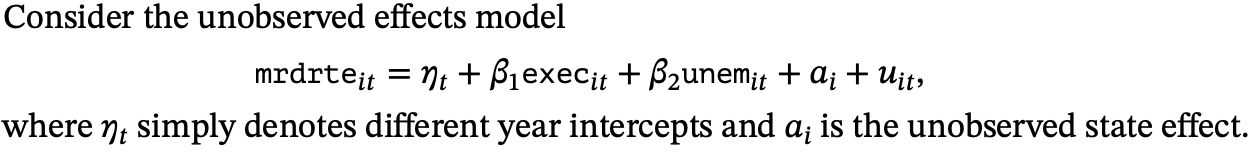

### (1) Read the dataset

In [15]:
murder = pd.read_csv('murder.csv', na_values='.')
print(murder.head())  # выводим первые 5 строк для проверки
murder = murder.set_index(['id', 'year']) # устанавливаем индексы: идентификатор штата и год

   id state  year  mrdrte  exec  unem  d90  d93  cmrdrte  cexec  cunem  \
0   1    AL    87     9.3     2   7.8    0    0      NaN    NaN    NaN   
1   1    AL    90    11.6     5   6.8    1    0      2.3    3.0   -1.0   
2   1    AL    93    11.6     2   7.5    0    1      0.0   -3.0    0.7   
3   2    AK    87    10.1     0  10.8    0    0      NaN    NaN    NaN   
4   2    AK    90     7.5     0   6.9    1    0     -2.6    0.0   -3.9   

   cexec_1  cunem_1  
0      NaN      NaN  
1      NaN      NaN  
2      3.0     -1.0  
3      NaN      NaN  
4      NaN      NaN  


### (2) What sign do you think 𝛽1 and 𝛽2 should have?
Если смертная казнь оказывает сдерживающий эффект, то коэффициент beta1 должен быть отрицательным. 
Кажется, что, по логическим соображениям,коэффициент beta2 долженен быть положительным. Чем больше безработных, тем больше социальная напряженность, тем больше уровень преступности, включая убийства. Но может в модели присутствовать какое-то смещение


### (3) Estimate the equation by pooled OLS
Как такового сдерживающего эффекта нет, так как коэффициент при exec оказывается статистически незначимым и при этом больше нуля

In [300]:
murder_subset = murder.query('year in [90, 93]')  # фильтруем данные по нужным годам
x = ['exec', 'unem'] # раз pooled regression, не надо выделять ни по годам, ни по entity 
xx = sm.add_constant(murder_subset[x])
pooled_model = PooledOLS(murder_subset['mrdrte'], xx)
pooled_results = pooled_model.fit(cov_type = 'robust') # ошибки heterosk, не HAR, раз можно 'ignore the serial correlation problem'
print(pooled_results)

                          PooledOLS Estimation Summary                          
Dep. Variable:                 mrdrte   R-squared:                        0.0931
Estimator:                  PooledOLS   R-squared (Between):              0.1131
No. Observations:                 102   R-squared (Within):              -6.7150
Date:                Sun, Feb 02 2025   R-squared (Overall):              0.0931
Time:                        02:21:52   Log-likelihood                   -380.29
Cov. Estimator:                Robust                                           
                                        F-statistic:                      5.0811
Entities:                          51   P-value                           0.0079
Avg Obs:                       2.0000   Distribution:                    F(2,99)
Min Obs:                       2.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             9.9113
                            

### (4) Now, using 1990 and 1993, estimate the equation by fixed effects
C FD в ноль уйдет альфа, то есть entity effect. Но с time effect такого не произойдет, поэтому сделаем dummy переменные

Есть уже сдерживающий эффект, коэффициент при exec отрицательный и статистически значимый на 5% уровне значимости

Насколько сильный эффект: при увеличении количества смертных казней на единицу, количество убийств на 100 тыс. человек уменьшается в среднем на 0,1 при прочих равных

In [305]:
x = ['exec', 'unem', 'd90'] #добавляем одну dummy, чтобы не было мультиколлинеарности
xx = murder_subset[x]
fd_model = FirstDifferenceOLS(murder_subset['mrdrte'], xx)
fd_results = fd_model.fit(cov_type='robust')
print(fd_results)

                     FirstDifferenceOLS Estimation Summary                      
Dep. Variable:                 mrdrte   R-squared:                        0.1653
Estimator:         FirstDifferenceOLS   R-squared (Between):             -0.0776
No. Observations:                  51   R-squared (Within):               0.1653
Date:                Sun, Feb 02 2025   R-squared (Overall):             -0.0772
Time:                        02:24:57   Log-likelihood                   -74.693
Cov. Estimator:                Robust                                           
                                        F-statistic:                      3.1694
Entities:                          51   P-value                           0.0326
Avg Obs:                       2.0000   Distribution:                    F(3,48)
Min Obs:                       2.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             13.520
                            

### (5) Compute the heteroskedasticity-robust standard error for the estimation in part (3)

In [307]:
std_errors = pooled_results.std_errors  # вытаскиваем стандартные ошибки из регресии, которые считались как robust

print("\nСтандартные ошибки:")
print(std_errors)


Стандартные ошибки:
const    5.336188
exec     0.140714
unem     1.072539
Name: std_error, dtype: float64


### (6) Find the state that has the largest number for the execution variable in 1993
Штат с наибольшим количеством казней - Техас (34 казни). Следующий - Вирджиния (11)

Разница существенная

In [309]:
top_exec = murder.query('year == 93')[['state', 'exec']].sort_values(by='exec', ascending=False)
top_state = top_exec.iloc[0]  # первый по количеству казней штат
second_state = top_exec.iloc[1]  # второй по количеству казней штат
print(f"Штат с наибольшими казнями: {top_state['state']} ({top_state['exec']})")
print (f"Второй по количеству казней штат: {second_state['state']} ({second_state['exec']})")
print(f"Разница: {top_state['exec'] - second_state['exec']}")

Штат с наибольшими казнями: TX (34)
Второй по количеству казней штат: VA (11)
Разница: 23


### (7) Estimate the equation using first differencing, dropping Texas from the analysis
Видим, что коэффициент при exec перестал быть значимым. Видимо, Техас был тем самым выбросом, который давал положительный значимый результат

#### Usual standard errors (homoskedasticity)

In [341]:
murder_no_tx = murder_subset[murder_subset['state'] != 'TX']  # исключаем Техас
x = ['exec', 'unem', 'd90']
xx = murder_no_tx[x]
fd_no_tx_model = FirstDifferenceOLS(murder_no_tx['mrdrte'], xx)
fd_no_tx_results = fd_no_tx_model.fit() # по умолчанию ошибки гомоскедастичные
print(fd_no_tx_results)

                     FirstDifferenceOLS Estimation Summary                      
Dep. Variable:                 mrdrte   R-squared:                        0.1031
Estimator:         FirstDifferenceOLS   R-squared (Between):             -0.0682
No. Observations:                  50   R-squared (Within):               0.1031
Date:                Sun, Feb 02 2025   R-squared (Overall):             -0.0679
Time:                        02:52:57   Log-likelihood                   -73.646
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.8001
Entities:                          50   P-value                           0.1601
Avg Obs:                       2.0000   Distribution:                    F(3,47)
Min Obs:                       2.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             1.8001
                            

#### Heteroskedasticity-robust standard errors

In [318]:
murder_no_tx = murder_subset[murder_subset['state'] != 'TX']  # исключаем Техас
x = ['exec', 'unem', 'd90']
xx = murder_no_tx[x]
fd_no_tx_model = FirstDifferenceOLS(murder_no_tx['mrdrte'], xx)
fd_no_tx_results = fd_no_tx_model.fit(cov_type='robust') # выставляем гетероскедастичные ошибки
print(fd_no_tx_results)

                     FirstDifferenceOLS Estimation Summary                      
Dep. Variable:                 mrdrte   R-squared:                        0.1031
Estimator:         FirstDifferenceOLS   R-squared (Between):             -0.0682
No. Observations:                  50   R-squared (Within):               0.1031
Date:                Sun, Feb 02 2025   R-squared (Overall):             -0.0679
Time:                        02:33:32   Log-likelihood                   -73.646
Cov. Estimator:                Robust                                           
                                        F-statistic:                      1.8001
Entities:                          50   P-value                           0.1601
Avg Obs:                       2.0000   Distribution:                    F(3,47)
Min Obs:                       2.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             1.7365
                            

### (8) Use all three years of data and estimate the model by fixed effects
Эффект хотя и отрицательный, но незначимый на 5% уровне

In [329]:
x = ['exec', 'unem']
xx = sm.add_constant(murder[x])
fe_full_model = PanelOLS(murder['mrdrte'], xx, entity_effects = True, time_effects = True) 
                                                    # entity effects + time effects, как в модели
fe_full_results = fe_full_model.fit(cov_type='robust') 
    # ошибки тоже выставим heterosk; может, было бы даже лучше делать кластеризованные
print(fe_full_results)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 mrdrte   R-squared:                        0.0109
Estimator:                   PanelOLS   R-squared (Between):              0.0037
No. Observations:                 153   R-squared (Within):               0.0026
Date:                Sun, Feb 02 2025   R-squared (Overall):              0.0036
Time:                        02:40:28   Log-likelihood                   -375.63
Cov. Estimator:                Robust                                           
                                        F-statistic:                      0.5391
Entities:                          51   P-value                           0.5850
Avg Obs:                       3.0000   Distribution:                    F(2,98)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             1.8797
                            

#### Ппопробуем кластерные ошибки, может, тогда коэффициенты правда окажутся значимыми

In [338]:
x = ['exec', 'unem']
xx = sm.add_constant(murder[x])
fe_full_model = PanelOLS(murder['mrdrte'], xx, entity_effects = True, time_effects = True) 

fe_full_results = fe_full_model.fit(cov_type='clustered', cluster_entity = True, cluster_time = True) 
print(fe_full_results)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 mrdrte   R-squared:                        0.0109
Estimator:                   PanelOLS   R-squared (Between):              0.0037
No. Observations:                 153   R-squared (Within):               0.0026
Date:                Sun, Feb 02 2025   R-squared (Overall):              0.0036
Time:                        02:43:48   Log-likelihood                   -375.63
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      0.5391
Entities:                          51   P-value                           0.5850
Avg Obs:                       3.0000   Distribution:                    F(2,98)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             2.1978
                            